In [23]:
!pip install plotly
!pip install pytrends


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [24]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pytrends.request import TrendReq

Setup Pytrend Library

In [25]:
pytrends = TrendReq(hl='US',tz=360)
keyword = " ChatGPT"

Data Request 

In [29]:

pytrends.build_payload(
    kw_list=[keyword],
    cat=0,
    timeframe='today 12-m',  
    geo='',
    gprop=''
)


Country Wise Interest

In [30]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by=keyword, ascending=False).head(15)


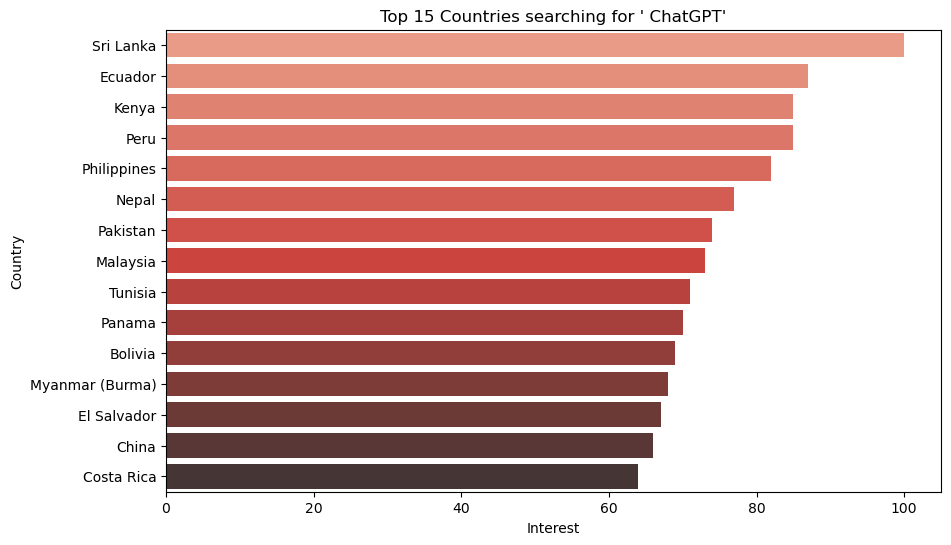

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=region_data[keyword],
    y=region_data.index,
    hue=region_data.index,
    palette="Reds_d",
    legend=False
)
plt.title(f"Top 15 Countries searching for '{keyword}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()



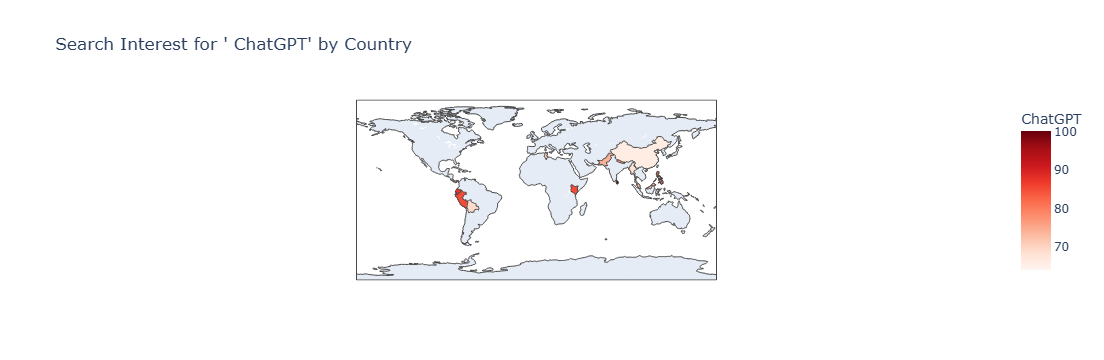

In [36]:
region_data = region_data.reset_index()
fig = px.choropleth(
    region_data,
    locations='geoName',
    locationmode='country names',
    color=keyword,
    title=f"Search Interest for '{keyword}' by Country",
    color_continuous_scale='Reds'
)
fig.show()

region_data = region_data.reset_index()
fig = px.choropleth(
    region_data,
    locations='geoName',
    locationmode='country names',
    color=keyword,
    title=f"Search Interest for '{keyword}' by Country",
    color_continuous_scale='Reds'
)
fig.show()


Interest Over Time

In [32]:
time_df=pytrends.interest_over_time()

C:\Users\princ\AppData\Roaming\Python\Python312\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



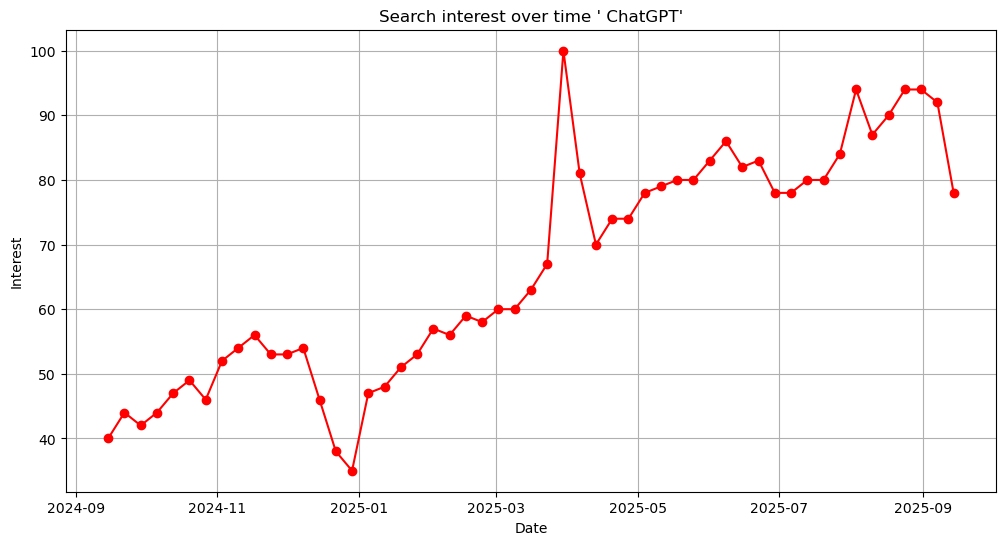

In [33]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword], marker='o', color='Red')
plt.title(f"Search interest over time '{keyword}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()


In [39]:
kw_list = ["Artificial Intelligence", "Data science", "Machine learning"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='', gprop='')




keyword comparison

C:\Users\princ\AppData\Roaming\Python\Python312\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



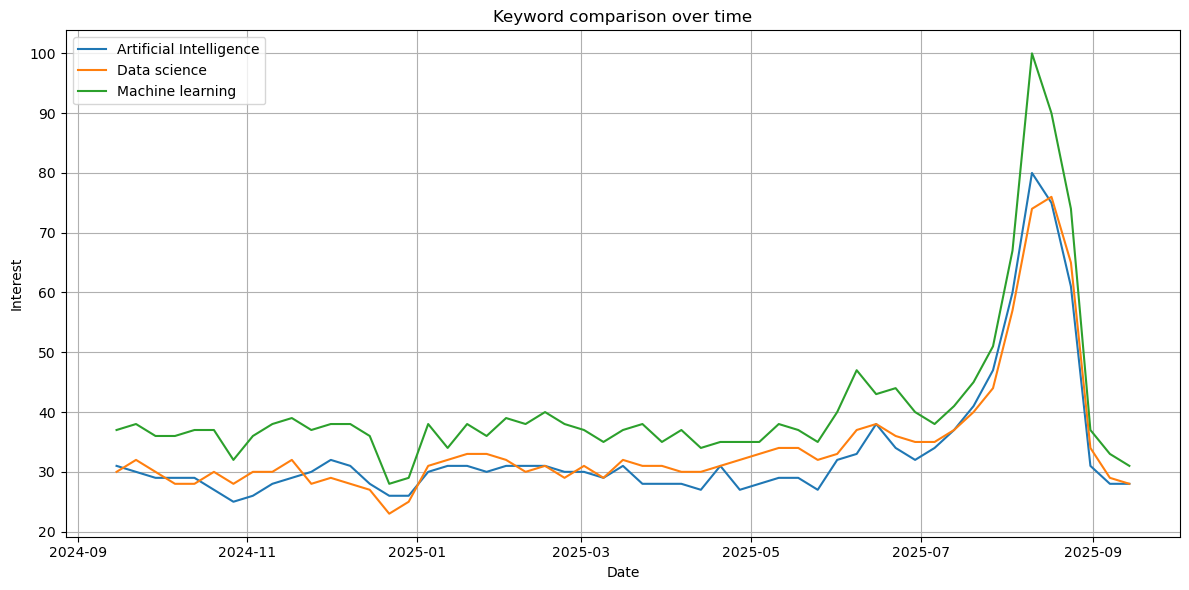

In [40]:
compare_df = pytrends.interest_over_time()

plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label=kw)

plt.title("Keyword comparison over time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()